# Rectangular Stratified Sampling - Example 1

- Author: Michael D. Shields
- Date: July 02, 2020

In this example, the stratified sampling method is employed to generate samples from an exponential distribution. The method illustrates various aspects of the UQpy.SampleMethods.RectangularSTS class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the STS class from UQpy.SampleMethods.

In [1]:
from UQpy.sampling import StratifiedSampling
from UQpy.distributions import Exponential
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from UQpy.utilities.strata import Rectangular

Run STS for 25 samples.

- 2 dimensions
- Five strata in each dimension
- Exponential distribution with location parameter = 1 and scale parameter = 1.

Create a distribution object.

In [2]:
marginals = [Exponential(loc=1., scale=1.), Exponential(loc=1., scale=1.)]

## Create strata with equal volume

Create a strata object using RectangularStrata class.

In [3]:
strata = Rectangular(strata_number=[5, 5])

Generate samples using RectangularSTS class, one sample is generate inside eacch stratum.

In [4]:
x_sts = StratifiedSampling(distributions=marginals,
                           strata_object=strata, 
                           samples_per_stratum_number=1)

Plot the resulting stratified samples and the boundaries of the strata in the U(0,1) space.

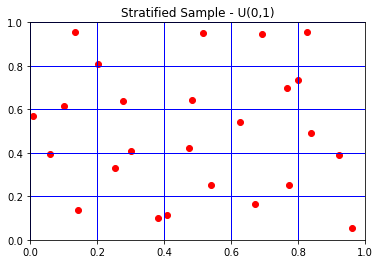

In [5]:
fig = strata.plot_2d()
plt.title('Stratified Sample - U(0,1)')
plt.scatter(x_sts.samplesU01[:, 0], x_sts.samplesU01[:, 1], color='r')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [6]:
print(x_sts.weights)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04
 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04]


Plot the resulting stratified exponential samples and the boundaries of the strata in the exponential space.

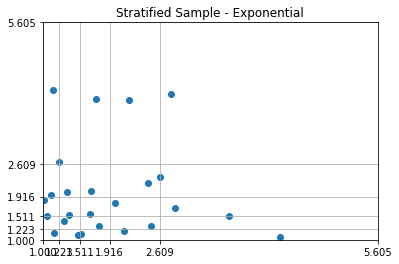

In [7]:
fig, ax = plt.subplots()
plt.title('Stratified Sample - Exponential')
plt.scatter(x_sts.samples[:, 0], x_sts.samples[:, 1])
ax.set_yticks([1.0, expon.ppf(0.2, 1, 1), expon.ppf(0.4, 1, 1), expon.ppf(0.6, 1, 1), expon.ppf(0.8, 1, 1),
               expon.ppf(0.99, 1, 1)])
ax.set_xticks([1.0, expon.ppf(0.2, 1, 1), expon.ppf(0.4, 1, 1), expon.ppf(0.6, 1, 1), expon.ppf(0.8, 1, 1),
               expon.ppf(0.99, 1, 1)])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.ylim(1, expon.ppf(0.99, 1, 1))
plt.xlim(1, expon.ppf(0.99, 1, 1))
plt.show()

In [8]:
print(x_sts.samples)

[[1.154602   1.14851002]
 [1.48026876 1.10616104]
 [1.52647984 1.12240447]
 [2.10889132 1.17794579]
 [4.26272134 1.05457947]
 [1.06121514 1.50066288]
 [1.29400718 1.40132433]
 [1.77635222 1.28894159]
 [2.48021139 1.2901796 ]
 [3.55542828 1.49452596]
 [1.00979005 1.84711733]
 [1.35718376 1.52679869]
 [1.64454905 1.55002721]
 [1.98703533 1.77608405]
 [2.82105291 1.67357522]
 [1.10725925 1.95445831]
 [1.3253244  2.01522749]
 [1.66154964 2.02721238]
 [2.45086106 2.20177921]
 [2.61074056 2.32963838]
 [1.14332988 4.16605293]
 [1.22467538 2.65757123]
 [1.72508292 3.97846375]
 [2.18189744 3.95363759]
 [2.75588273 4.09186222]]


## Create stratification using seeds and widths

Strata object can be initiated by defining seeds and widths of the strata.

In [9]:
seeds = np.array([[0, 0], [0.4, 0], [0, 0.5], [0.4, 0.5]])
widths = np.array([[0.4, 0.5], [0.6, 0.5], [0.4, 0.5], [0.6, 0.5]])
strata_obj = Rectangular(seeds=seeds, widths=widths)

Generate samples using RectangularSTS class. User can control the number of samples generated inside each stratum. In this illustration, 10 samples are generated such that nsamples_per_stratum governs the number of sa

In [10]:
sts_obj = StratifiedSampling(distributions=marginals, strata_object=strata_obj, random_state=20)
sts_obj.run(samples_per_stratum_number=[1, 2, 3, 4])

Plot show the strata and samples generated in each stratum.

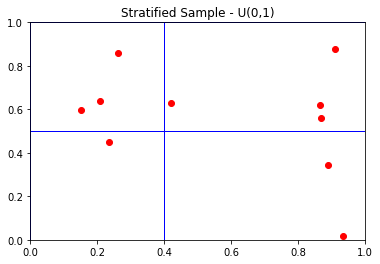

In [11]:
fig = strata_obj.plot_2d()
plt.title('Stratified Sample - U(0,1)')
plt.scatter(sts_obj.samplesU01[:, 0], sts_obj.samplesU01[:, 1], color='r')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Probability weights corresponding to each samples computed using Stratified sampling.

In [12]:
sts_obj.weights

array([0.2       , 0.15      , 0.15      , 0.06666667, 0.06666667,
       0.06666667, 0.075     , 0.075     , 0.075     , 0.075     ])

## Create stratification using input file

Strata object can be defined using a input file, which contains the seeds and widths of each stratum.

In [13]:
strata_obj1 = Rectangular(input_file='strata.txt')

Generate samples inside eaach stratum using RectangularSTS class.

In [14]:
sts_obj1 = StratifiedSampling(distributions=marginals, strata_object=strata_obj1, samples_per_stratum_number=1)

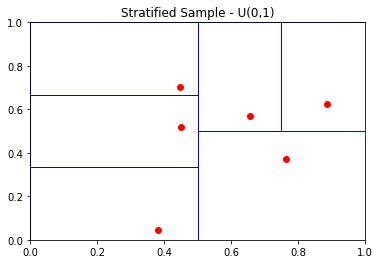

In [15]:
fig = strata_obj1.plot_2d()
plt.title('Stratified Sample - U(0,1)')
plt.scatter(sts_obj1.samplesU01[:, 0], sts_obj1.samplesU01[:, 1], color='r')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

## Proportional sampling

RectangularSTS class can generate samples proportional to volume of each strarum. 

In [16]:
strata_obj.random_state = 24
sts_obj2 = StratifiedSampling(distributions=marginals, strata_object=strata_obj)
sts_obj2.run(samples_number=10)

It can be noticed that new sample in each stratum is proportional to volume.

In [17]:
print('Volume: ', sts_obj2.strata_object.volume)
print('Number of samples in each stratum: ', sts_obj2.samples_per_stratum_number)

Volume:  [0.2 0.3 0.2 0.3]
Number of samples in each stratum:  [2. 3. 2. 3.]


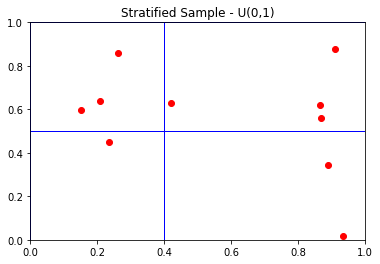

In [18]:
fig = strata_obj.plot_2d()
plt.title('Stratified Sample - U(0,1)')
plt.scatter(sts_obj.samplesU01[:, 0], sts_obj.samplesU01[:, 1], color='r')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()